# Plots for presentation
created 19.04.25

In [89]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import itertools

import matplotlib as mpl
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scipy

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [2]:
# Settings

# Path to resource folder with the structures and metadata tables
path_resources = Path(r"D:\Eigene Datein\dev\Uni\JGU Bio Bachelorthesis\Daten\resources")

path_AF2 = path_resources / "AF2"
path_AF3 = path_resources / "AF3"
path_solved = path_resources / "solved"

In [3]:
dataAF2 = pd.read_csv(path_AF2 / "AF2_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF2.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF2[c] = dataAF2[c].astype(pd.Int64Dtype())
display(dataAF2)

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,salt_bridges,hbonds,hydrophobic_interactions
0,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
1,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,312,5,A,B,165,...,0.979658,0.880716,0.418230,1.100588,0.050000,613.651,6.063,0,9,0
2,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,312,5,A,B,165,...,0.969753,0.883186,0.641834,1.776257,0.185185,323.304,5.092,0,2,9
3,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,312,5,A,B,165,...,1.260424,0.475511,1.686332,5.358800,0.363636,853.680,5.658,11,12,6
4,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,312,5,A,B,165,...,1.759591,0.223400,2.928606,9.908745,0.888889,851.771,5.691,9,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,60,113,B,B,392,...,5.341712,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3176,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,60,113,B,B,392,...,5.975135,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3177,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,60,113,B,B,392,...,5.962444,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3178,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,60,113,B,B,392,...,5.901696,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [4]:
dataAF3 = pd.read_csv(path_AF3 / "AF3_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF3.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF3[c] = dataAF3[c].astype(pd.Int64Dtype())
display(dataAF3)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,salt_bridges,hbonds,hydrophobic_interactions,ipSAE
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.967617,0.341276,0.831159,0.000000,848.152,5.371,9,0,6,0.869025
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.943274,0.426121,1.169542,0.076923,603.522,6.264,0,0,0,0.868551
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.908970,0.621263,1.944753,0.111111,602.041,6.241,0,0,0,0.855837
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,0.961964,0.382246,1.037074,0.038462,615.163,6.207,0,0,0,0.850758
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,0.931179,0.573091,1.749101,0.074074,662.502,5.890,0,0,0,0.850449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1447.877,4.251,1,0,19,0.012324
3176,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1482.311,4.197,1,0,25,0.000000
3177,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1564.435,4.783,2,0,18,0.000000
3178,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1431.933,4.257,0,0,59,0.000000


In [5]:
dataAF = pd.merge(
    left=dataAF3,
    right=dataAF2,
    left_on=["benchmark_set", "prediction_name", "model_id"],
    right_on=["benchmark_set", "prediction_name", "model_id"],
    suffixes=["_AF3", "_AF2"],
    how="inner"
)
for c in ["chainA_length", "chainB_length", "chainA_id", "chainB_id", "chainA_start", "chainA_end", "chainB_start", "chainB_end", "PDB_id", "ELM_instance", "DDI_pfam_id", "PDB_id_random_paired", "ELM_instance_random_paired", "DDI_pfam_id_random_paired", "sequence_initial", "sequence_mutated", "num_mutations"]:
    if len(dataAF[~(dataAF[c+"_AF2"] == dataAF[c+"_AF3"]) & (~dataAF[c+"_AF2"].isna()) & (~dataAF[c+"_AF3"].isna())]) > 0:
        print(f"Unmatched column {c}")
        continue
    dataAF.drop(columns=[c+"_AF2"], inplace=True)
    dataAF.rename(columns={c+"_AF3": c}, inplace=True)
dataAF.rename(columns={"ranking_score": "ranking_score_AF3"}, inplace=True)
dataAF.rename(columns={"model_confidence": "model_confidence_AF2"}, inplace=True)
dataAF.rename(columns={"ipSAE": "ipSAE_AF3"}, inplace=True)

display(dataAF)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom_AF2,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.979658,0.880716,0.418230,1.100588,0.050000,613.651,6.063,0,9,0
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.969753,0.883186,0.641834,1.776257,0.185185,323.304,5.092,0,2,9
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,1.260424,0.475511,1.686332,5.358800,0.363636,853.680,5.658,11,12,6
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,1.759591,0.223400,2.928606,9.908745,0.888889,851.771,5.691,9,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,5.341712,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3166,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,5.975135,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3167,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,5.962444,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3168,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,5.901696,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [6]:
dataSolved = pd.read_csv(path_solved / "solved_metrics.tsv", sep="\t")
display(dataSolved)

,set,PDB_id,DDI_pfam_id,path,chainA_id,chainB_id,min_distance,buried_area,salt_bridges,hbonds,hydrophobic_interactions
0,DMI,1ATP,NaN,DMI\1ATP_min_DMI.pdb,A,B,6.273,808.592,0,0,77
1,DMI,1AXC,NaN,DMI\1AXC_min_DMI.pdb,A,B,4.174,1209.332,0,4,62
2,DMI,1B72,NaN,DMI\1B72_min_DMI.pdb,A,B,5.182,547.149,0,0,36
3,DMI,1B8Q,NaN,DMI\1B8Q_min_DMI.pdb,A,B,4.376,871.756,0,4,42
4,DMI,1BXX,NaN,DMI\1BXX_min_DMI.pdb,A,B,4.435,783.465,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...
183,DDI,3ZNI,PF14447_PF00179,DDI\PF14447_PF00179_3ZNI_AC.pdb,A,C,5.268,1288.881,0,0,85
184,DDI,3J7Y,PF14978_PF00327,DDI\PF14978_PF00327_3J7Y_oZ.pdb,o,Z,4.885,2488.556,0,0,70
185,DDI,6D6Q,PF15985_PF10175,DDI\PF15985_PF10175_6D6Q_GL.pdb,G,L,3.891,3659.160,2,0,167
186,DDI,3KZ1,PF17838_PF00071,DDI\PF17838_PF00071_3KZ1_BE.pdb,B,E,5.276,1249.398,2,0,60


In [7]:
# Stop cell designed to crash to allow "Run All" command in Jupyter notebooks to stop here
raise Exception("STOP")

Exception: STOP

In [11]:
dataAF[dataAF["min_distance_AF3"] > 7]

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom_AF2,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
258,alphafold3,known_DMI,LIG_CaM_IQ_9_2IX7,ranked_3,0.72,139,17,A,B,8,...,8.674064,0.219606,8.597127,9.855108,0.693878,525.532,4.915,1,3,57
326,alphafold3,known_DMI,LIG_GYF_1L2Z,ranked_1,0.69,62,9,A,B,1,...,5.463663,0.184342,6.077640,12.668642,0.687500,891.132,6.348,2,2,45
365,alphafold3,known_DMI,LIG_LRP6_Inhibitor_1_3SOQ,ranked_0,0.93,305,7,A,B,20,...,1.867508,0.399350,1.754778,5.388164,0.833333,667.633,7.030,0,0,24
726,alphafold3,random_DMI,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,ranked_1,0.73,71,5,A,B,5,...,10.245194,NaN,NaN,NaN,NaN,252.073,5.412,0,2,0
736,alphafold3,random_DMI,MDOC_ANK_TNKS_1_3TWU.DLIG_CAP-Gly_1_2PZO,ranked_1,0.65,46,8,A,B,46,...,34.486889,NaN,NaN,NaN,NaN,734.832,8.082,0,3,4
826,alphafold3,random_DMI,MDOC_USP7_MATH_2_1YY6.DTRG_NLS_Bipartite_1_1PJM,ranked_1,0.70,460,7,A,B,70,...,13.623671,NaN,NaN,NaN,NaN,-0.000,NaN,0,0,0
998,alphafold3,random_DMI,MLIG_GBD_Chelix_1_2K42.DLIG_FAT_LD_1_3GM1,ranked_3,0.54,140,9,A,B,869,...,6.686772,NaN,NaN,NaN,NaN,498.270,5.304,0,1,9
1141,alphafold3,random_DMI,MLIG_PCNA_yPIPBox_3_1SXJ.DLIG_CORNRBOX_1KKQ,ranked_1,0.71,164,13,A,B,276,...,14.582132,NaN,NaN,NaN,NaN,0.000,NaN,0,0,0
1315,alphafold3,random_DMI,MTRG_AP2beta_CARGO_1_2G30.DDOC_PP1_MyPhoNE_1_1S70,ranked_0,0.71,299,11,A,B,1,...,11.058933,NaN,NaN,NaN,NaN,590.518,6.663,0,2,29
1534,alphafold3,mutations_DMI,DOC_MAPK_HePTP_8_2GPH_LQERRGSNVALML.DQERRGSNVALMD,ranked_4,0.30,334,13,A,B,21,...,2.411801,NaN,NaN,NaN,NaN,900.724,5.331,5,3,18


In [67]:
dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,hbonds_AF2,hydrophobic_interactions_AF2,buried_area_AF3_normed,salt_bridges_AF3_normed,hbonds_AF3_normed,hydrophobic_interactions_AF3_normed,buried_area_AF2_normed,salt_bridges_AF2_normed,hbonds_AF2_normed,hydrophobic_interactions_AF2_normed
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,10,3,212.038000,2.250000,0.0,1.500000,165.526000,0.0,2.5,0.75
5,alphafold3,known_DMI,DEG_COP1_1_5IGO,ranked_0,0.97,324,8,A,B,352,...,9,0,85.616750,0.000000,0.0,0.000000,72.538750,0.0,1.125,0.0
10,alphafold3,known_DMI,DEG_Kelch_Keap1_1_2FLU,ranked_0,0.96,285,6,A,B,325,...,6,55,214.093500,0.500000,0.0,8.166667,163.422333,0.0,1.0,9.166667
15,alphafold3,known_DMI,DEG_Kelch_Keap1_2_3WN7,ranked_0,0.92,286,7,A,B,324,...,2,104,161.159333,0.000000,0.0,17.833333,161.621500,0.0,0.333333,17.333333
20,alphafold3,known_DMI,DEG_MDM2_SWIB_1_1YCR,ranked_0,0.89,80,8,A,B,30,...,2,109,139.754000,1.500000,0.0,2.666667,163.596667,0.0,0.333333,18.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,alphafold3,known_DMI,TRG_ER_FFAT_1_2RR3,ranked_0,0.94,125,9,A,B,4,...,4,18,91.590556,0.000000,0.0,2.111111,90.635222,0.0,0.444444,2.0
660,alphafold3,known_DMI,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_0,0.98,147,7,A,B,1,...,5,19,152.954000,0.142857,0.0,7.285714,115.826857,0.0,0.714286,2.714286
665,alphafold3,known_DMI,TRG_NES_CRM1_1_3GB8,ranked_0,0.91,179,16,A,B,447,...,5,104,125.137500,0.142857,0.0,8.571429,99.238857,0.357143,0.357143,7.428571
670,alphafold3,known_DMI,TRG_NLS_Bipartite_1_1PJM,ranked_0,0.67,460,17,A,B,70,...,12,29,59.132133,0.066667,0.0,1.733333,58.867467,0.2,0.8,1.933333


## 1 Adding normed interface metrics

In [16]:
normed_metrics_columns = ["buried_area", "salt_bridges", "hbonds", "hydrophobic_interactions"]

for c in [v+"_AF3" for v in normed_metrics_columns] + [v+"_AF2" for v in normed_metrics_columns]:
    dataAF[c+"_normed"] = dataAF.apply(lambda r: r[c]/r["buried_area_AF2"] if r["buried_area_AF2"] > 0 else None, axis=1)

## 2 Plotting interface metrics

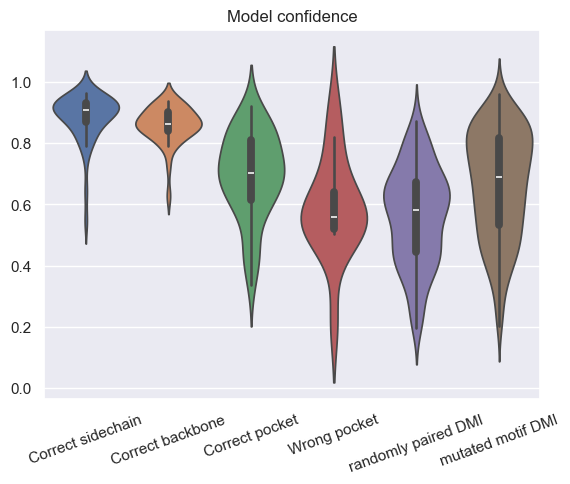

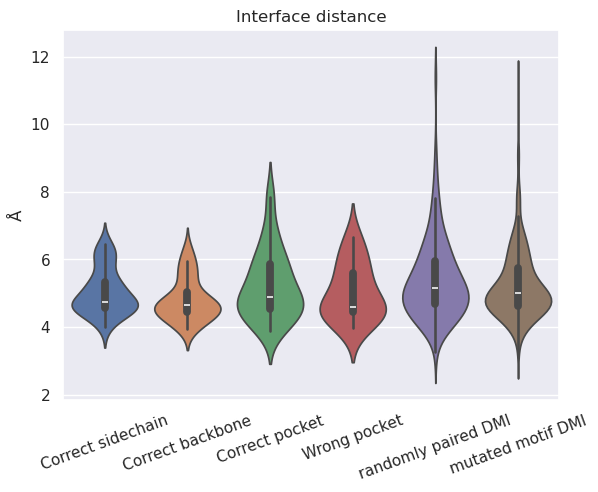

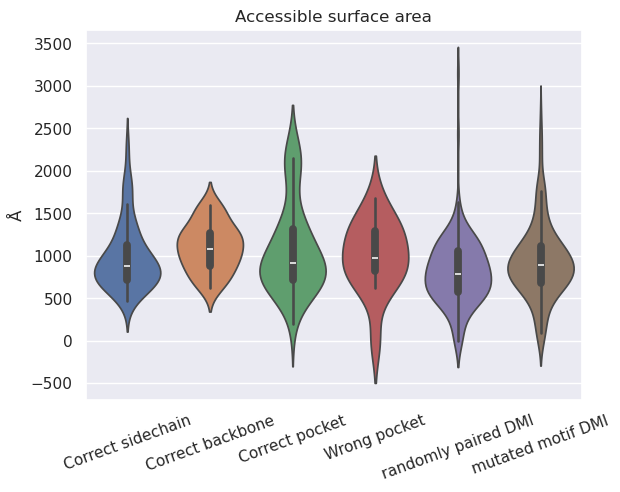

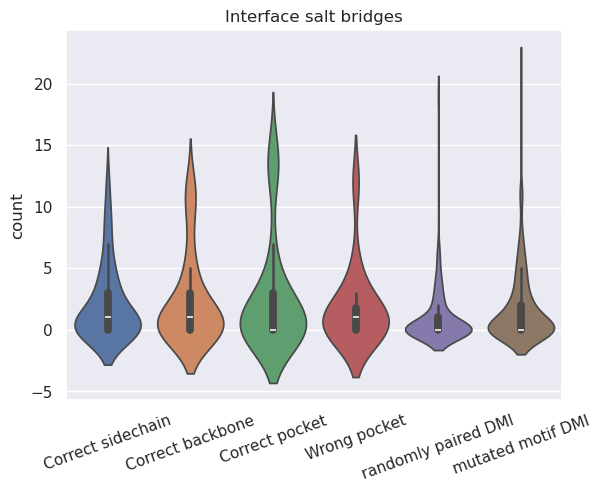

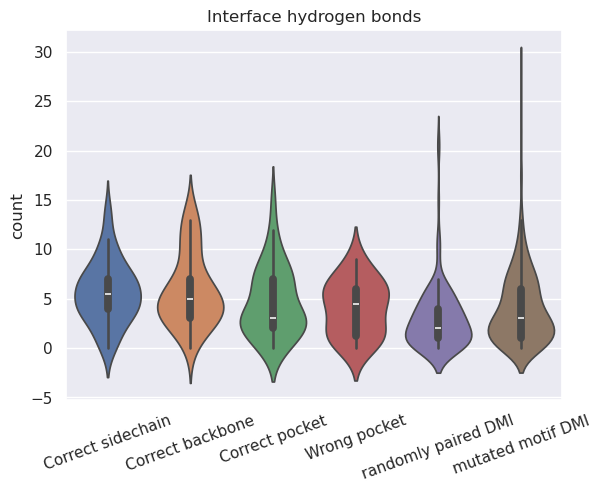

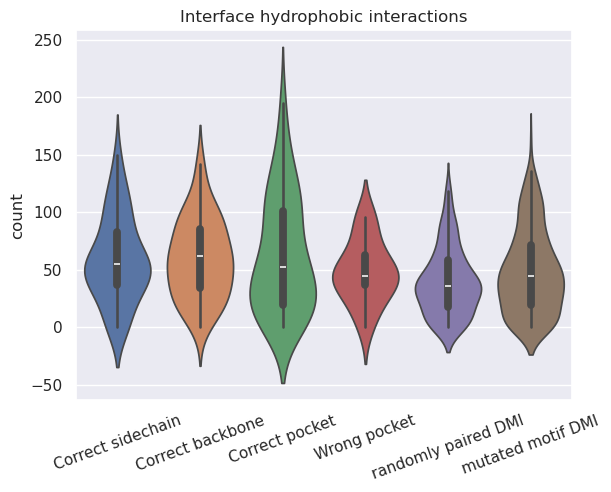

In [37]:
d = {}
classifications = {
    "Correct sidechain": (-np.inf, 2), 
    "Correct backbone": (2, 5), 
    "Correct pocket": (5, 15), 
    "Wrong pocket": (15, np.inf)
    }

af_v = "AF2"
for label, ra in classifications.items():
    d[label] = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] > ra[0]) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= ra[1])]

d["randomly paired DMI"] = dataAF[(dataAF["benchmark_set"] == "random_DMI") & (dataAF["model_id"] == "ranked_0")]
d["mutated motif DMI"] = dataAF[(dataAF["benchmark_set"] == "mutations_DMI") & (dataAF["model_id"] == "ranked_0")]

sns.set_theme()
categories = {
    "ranking_score" if af_v == "AF3" else "model_confidence" : ["Model confidence", ""], 
    f"min_distance_{af_v}": ["Interface distance", "Å"],
    f"buried_area_{af_v}": ["Accessible surface area", "Å"], 
    f"salt_bridges_{af_v}": ["Interface salt bridges", "count"], 
    f"hbonds_{af_v}": ["Interface hydrogen bonds", "count"], 
    f"hydrophobic_interactions_{af_v}": ["Interface hydrophobic interactions", "count"]
}
for c, (title, ylabel) in categories.items():
    p = sns.violinplot({k:v[c] for k,v in d.items() })
    p.set_title(title)
    p.set_ylabel(ylabel)
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    plt.xticks(rotation=20)
    plt.show()

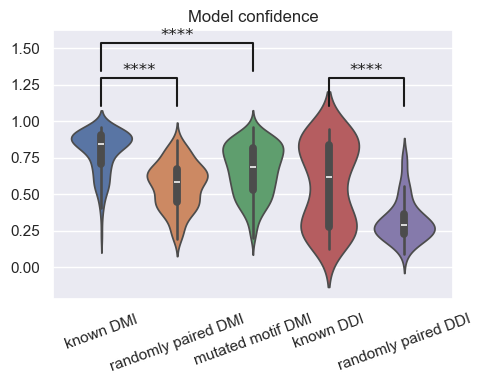

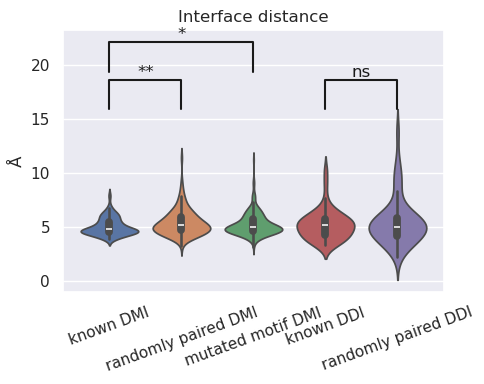

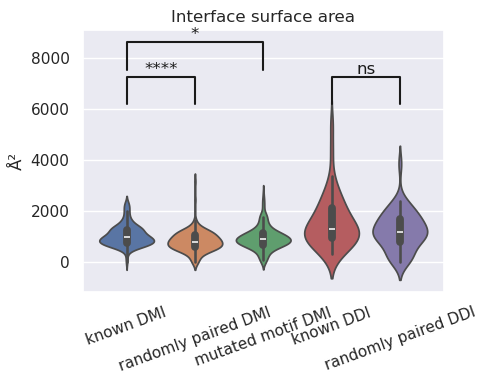

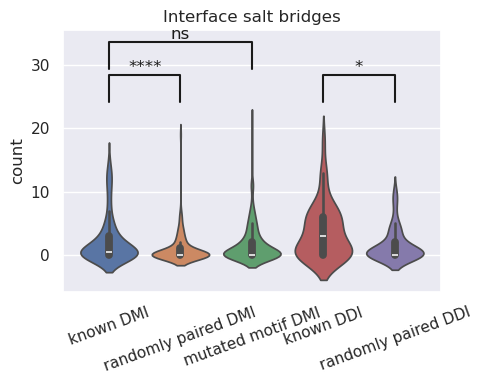

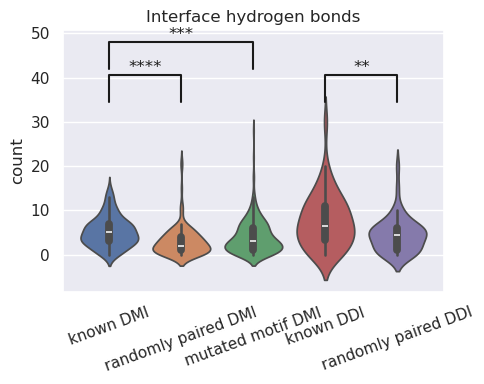

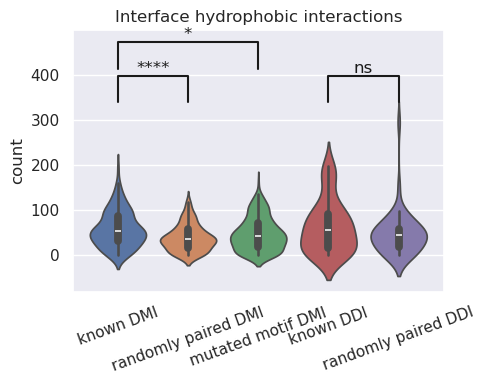

In [129]:
af_v = "AF2"
benchmark_sets = {
    "known_DMI": "known DMI", 
    "random_DMI" : "randomly paired DMI", 
    "mutations_DMI": "mutated motif DMI", 
    "known_DDI": "known DDI", 
    "random_DDI": "randomly paired DDI"
    }

categories = {
    "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", ""], 
    f"min_distance_{af_v}": ["Interface distance", "Å"],
    f"buried_area_{af_v}": ["Interface surface area", "Å²"], 
    f"salt_bridges_{af_v}": ["Interface salt bridges", "count"], 
    f"hbonds_{af_v}": ["Interface hydrogen bonds", "count"], 
    f"hydrophobic_interactions_{af_v}": ["Interface hydrophobic interactions", "count"]
}


def plot_significance(data, col1, col2, y):
    data_max = np.max([max(v) for v in data.values()])
    x1, x2 = list(data.keys()).index(col1), list(data.keys()).index(col2)
    y, h, col = y*data_max, 0.2*data_max, 'k'
    stat, pvalue = scipy.stats.ttest_ind(data[col1], data[col2], equal_var=False)
    stat, pvalue = scipy.stats.mannwhitneyu(data[col1], data[col2])
    if pvalue < 0.0001:
        pvalue_label = "****"
    elif pvalue < 0.001:
        pvalue_label = "***"
    elif pvalue < 0.01:
        pvalue_label = "**"
    elif pvalue < 0.05:
        pvalue_label = "*"
    else:
        pvalue_label = "ns"
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, pvalue_label, ha='center', va='bottom', color=col)

sns.set_theme()

for i, (c, (title, ylabel)) in enumerate(categories.items()):
    plt.figure(figsize=(5,4))
    data = {label: list(dataAF[(dataAF["benchmark_set"] == benchmark_set) & (dataAF["model_id"] == "ranked_0")][c].dropna()) for benchmark_set, label in benchmark_sets.items()}
    #data = {label: list(dataAF[(dataAF["benchmark_set"] == benchmark_set)][c].dropna()) for benchmark_set, label in benchmark_sets.items()}
    p = sns.violinplot(data, inner="box")
    #p = sns.catplot(data)
    p.set_title(title)
    p.set_ylabel(ylabel)
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    plt.xticks(rotation=20)
    #plt.xticks(ticks=[]
    plot_significance(data, "known DMI", "randomly paired DMI", 1.15)
    plot_significance(data, "known DMI", "mutated motif DMI", 1.4)
    plot_significance(data, "known DDI", "randomly paired DDI", 1.15)
    plt.tight_layout()
    plt.show()

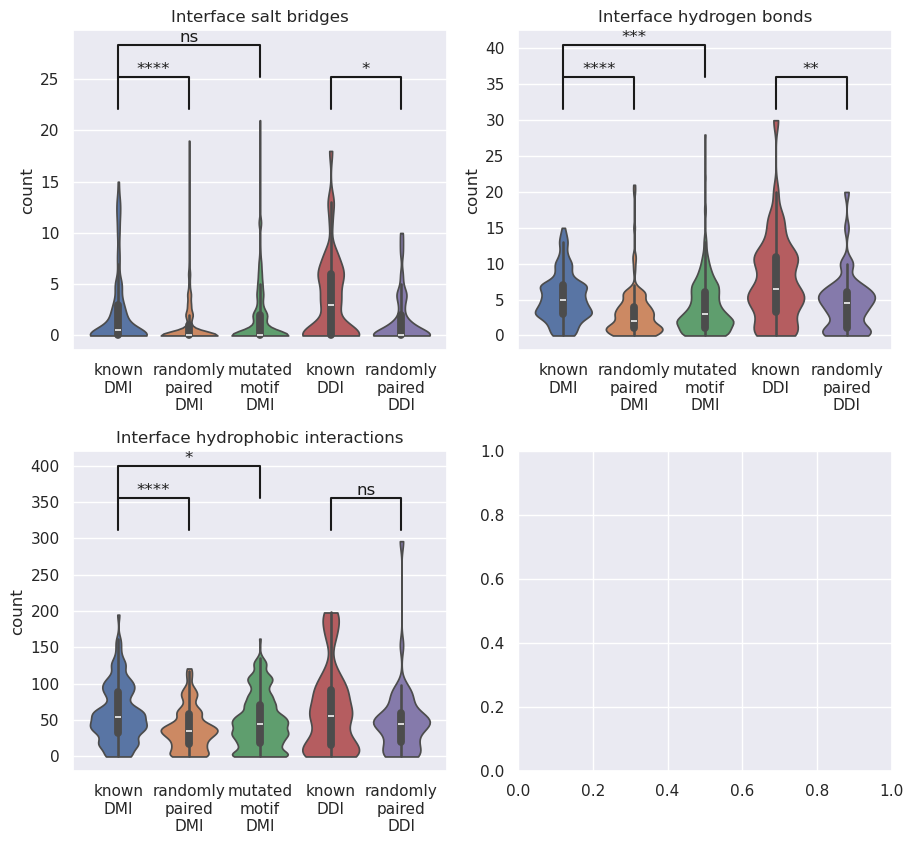

In [140]:
af_v = "AF2"
benchmark_sets = {
    "known_DMI": "known DMI", 
    "random_DMI" : "randomly paired DMI", 
    "mutations_DMI": "mutated motif DMI", 
    "known_DDI": "known DDI", 
    "random_DDI": "randomly paired DDI"
    }

categories = {
    "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", ""], 
    f"min_distance_{af_v}": ["Interface distance", "Å"],
    f"buried_area_{af_v}": ["Interface surface area", "Å²"], 
    f"salt_bridges_{af_v}": ["Interface salt bridges", "count"], 
    f"hbonds_{af_v}": ["Interface hydrogen bonds", "count"], 
    f"hydrophobic_interactions_{af_v}": ["Interface hydrophobic interactions", "count"]
}

categories = dict(list(categories.items())[3:6])



def plot_significance(ax, data, col1, col2, y):
    col1 = col1.replace(" ", "\n")
    col2 = col2.replace(" ", "\n")
    data_max = np.max([max(v) for v in data.values()])
    x1, x2 = list(data.keys()).index(col1), list(data.keys()).index(col2)
    y, h, col = y*data_max, 0.15*data_max, 'k'
    stat, pvalue = scipy.stats.ttest_ind(data[col1], data[col2], equal_var=False)
    stat, pvalue = scipy.stats.mannwhitneyu(data[col1], data[col2])
    if pvalue < 0.0001:
        pvalue_label = "****"
    elif pvalue < 0.001:
        pvalue_label = "***"
    elif pvalue < 0.01:
        pvalue_label = "**"
    elif pvalue < 0.05:
        pvalue_label = "*"
    else:
        pvalue_label = "ns"
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, pvalue_label, ha='center', va='bottom', color=col)

sns.set_theme()
mpl.rcParams['font.family'] = 'DejaVu Sans'
#fig, axes = plt.subplots(1, 2, figsize=(9.3, 4.3), dpi=100)
fig, axes = plt.subplots(2, 2, figsize=(9.3, 8.6), dpi=100)
axes = np.ndarray.flatten(axes)

for i, (c, (title, ylabel)) in enumerate(categories.items()):
    data = {label.replace(" ", "\n"): list(dataAF[(dataAF["benchmark_set"] == benchmark_set) & (dataAF["model_id"] == "ranked_0")][c].dropna()) for benchmark_set, label in benchmark_sets.items()}
    #data = {label: list(dataAF[(dataAF["benchmark_set"] == benchmark_set)][c].dropna()) for benchmark_set, label in benchmark_sets.items()}
    p = sns.violinplot(data, ax=axes[i], inner="box", cut=0, density_norm="area", bw_adjust=0.5)
    #p = sns.catplot(data)
    p.set_title(title)
    p.set_ylabel(ylabel)
    #mpl.rcParams['font.family'] = 'DejaVu Sans'
    #plt.xticks(rotation=20)
    #plt.xticks(ticks=[])

    plot_significance(axes[i], data, "known DMI", "randomly paired DMI", 1.05)
    plot_significance(axes[i], data, "known DMI", "mutated motif DMI", 1.2)
    plot_significance(axes[i], data, "known DDI", "randomly paired DDI", 1.05)
plt.tight_layout()
#plt.savefig(f"2025_04_26 violinplot {c}.svg")
#plt.savefig(f"2025_04_26 violinplot salt bridges and hbonds.svg")

plt.show()

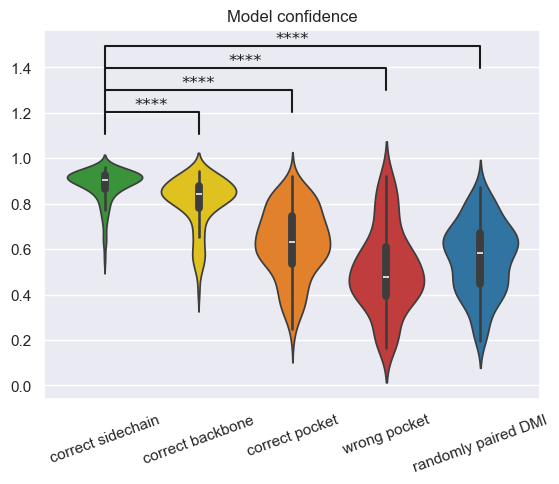

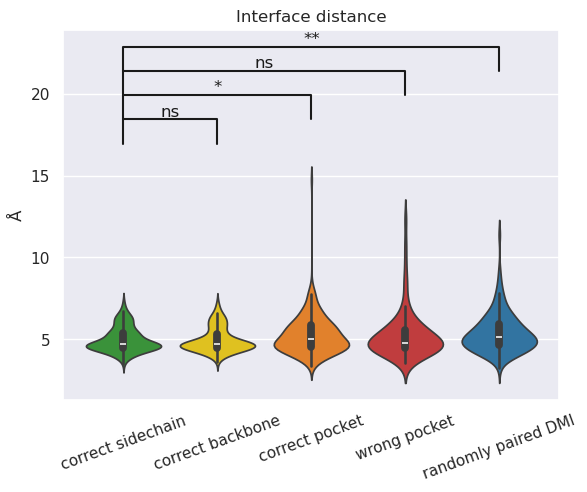

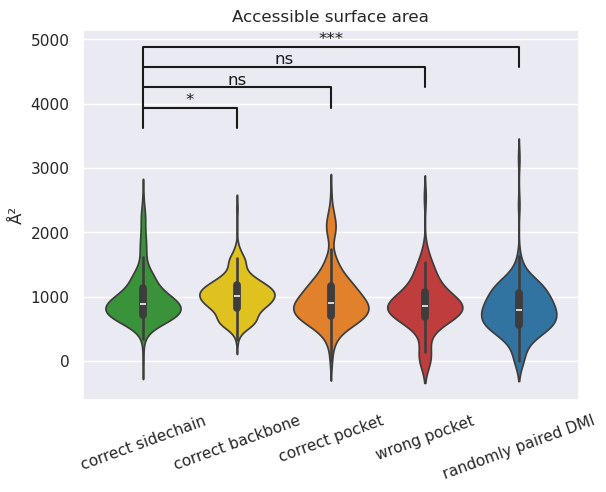

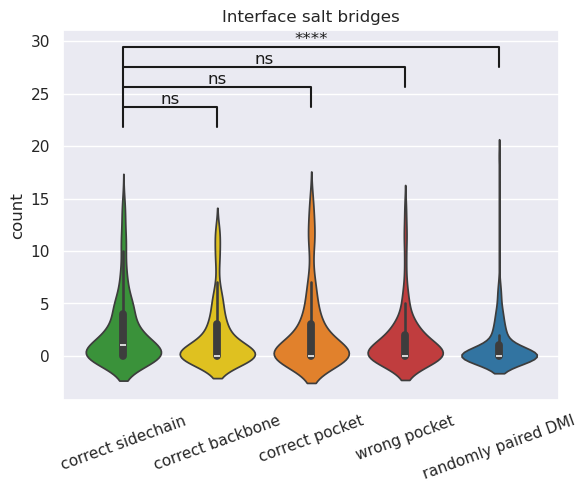

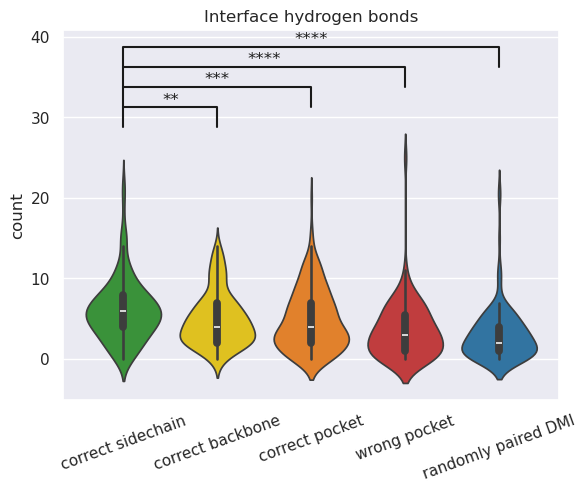

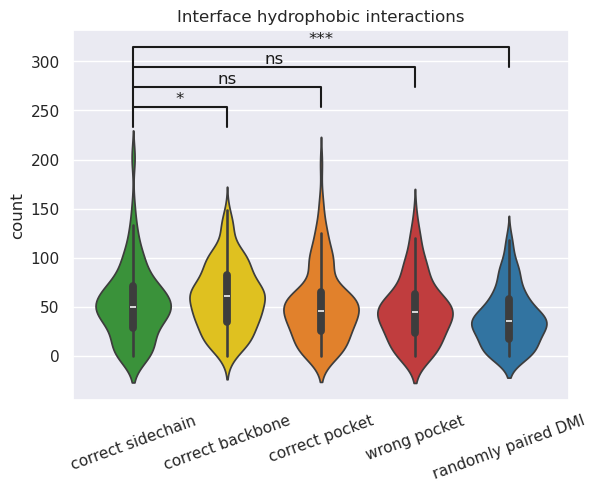

In [60]:
af_v = "AF2"
# classes = {
#     "correct sidechain": (-np.inf, 2, "tab:green"), 
#     "correct backbone": (2, 5, "gold"), 
#     "correct pocket": (5, 15, "tab:orange"), 
#     "wrong pocket": (15, np.inf, "tab:red"),
# }

classes = {
    "correct sidechain": (-np.inf, 2), 
    "correct backbone": (2, 5), 
    "correct pocket": (5, 15), 
    "wrong pocket": (15, np.inf),
}

categories = {
    "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", ""], 
    f"min_distance_{af_v}": ["Interface distance", "Å"],
    f"buried_area_{af_v}_normed": ["Accessible surface area", "Å²"], 
    f"salt_bridges_{af_v}_normed": ["Interface salt bridges", "count"], 
    f"hbonds_{af_v}_normed": ["Interface hydrogen bonds", "count"], 
    f"hydrophobic_interactions_{af_v}_normed": ["Interface hydrophobic interactions", "count"]
}
# Norm yes /NO
if True:
    categories = {k.replace("_normed", ""):v for k,v in categories.items()}

def plot_significance(data, col1, col2, y):
    data_max = np.max([max(v) for v in data.values()])
    x1, x2 = list(data.keys()).index(col1), list(data.keys()).index(col2)
    y, h, col = y*data_max, 0.1*data_max, 'k'
    #stat, pvalue = scipy.stats.ttest_ind(data[col1], data[col2], equal_var=False)
    stat, pvalue = scipy.stats.mannwhitneyu(data[col1], data[col2])
    if pvalue < 0.0001:
        pvalue_label = "****"
    elif pvalue < 0.001:
        pvalue_label = "***"
    elif pvalue < 0.01:
        pvalue_label = "**"
    elif pvalue < 0.05:
        pvalue_label = "*"
    else:
        pvalue_label = "ns"
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, pvalue_label, ha='center', va='bottom', color=col)

sns.set_theme()
for c, (title, ylabel) in categories.items():

    data = {label_class: list(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] > b_lower) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= b_upper)][c].dropna()) for label_class, (b_lower, b_upper) in classes.items()}
    data["randomly paired DMI"] = list(dataAF[(dataAF["benchmark_set"] == "random_DMI") & (dataAF["model_id"] == "ranked_0")][c].dropna())

    p = sns.violinplot(data, palette=["tab:green", "gold", "tab:orange", "tab:red", "tab:blue"])

    p.set_title(title)
    p.set_ylabel(ylabel)
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    plt.xticks(rotation=20)

    plot_significance(data, "correct sidechain", "correct backbone", 1.15)
    plot_significance(data, "correct sidechain", "correct pocket", 1.25)
    plot_significance(data, "correct sidechain", "wrong pocket", 1.35)
    plot_significance(data, "correct sidechain", "randomly paired DMI", 1.45)

    plt.show()



## ROC area

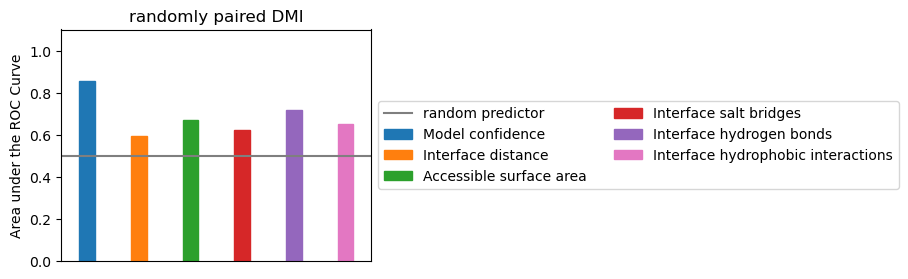

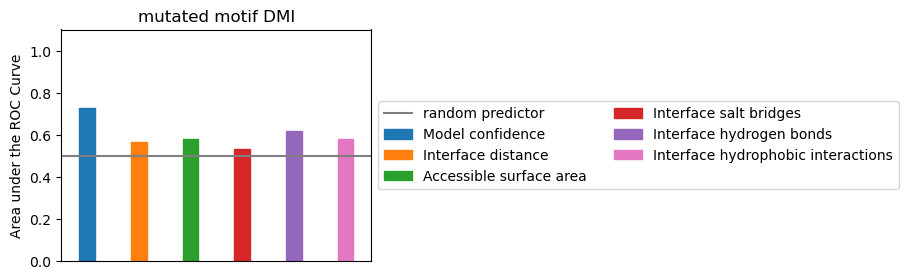

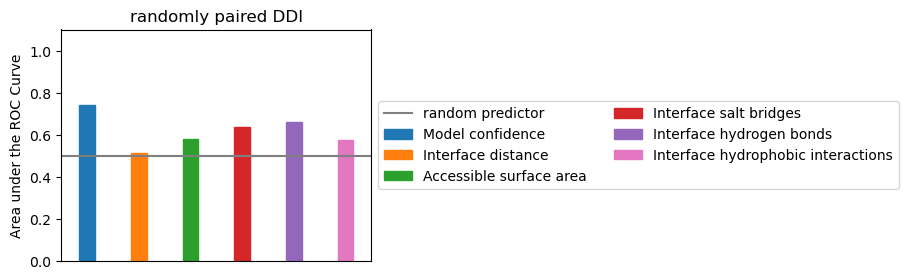

In [32]:
af_v = "AF2"
benchmark_sets = {
    "random_DMI" : "randomly paired DMI", 
    "mutations_DMI": "mutated motif DMI", 
    "random_DDI": "randomly paired DDI"
    }

categories = {
    "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", "tab:blue"], 
    f"min_distance_{af_v}": ["Interface distance", "tab:orange"],
    f"buried_area_{af_v}": ["Accessible surface area", "tab:green"], 
    f"salt_bridges_{af_v}": ["Interface salt bridges", "tab:red"], 
    f"hbonds_{af_v}": ["Interface hydrogen bonds", "tab:purple"], 
    f"hydrophobic_interactions_{af_v}": ["Interface hydrophobic interactions", "tab:pink"]
}

data_ref = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]
data_ref_DDI = dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")]
for benchmark_set, bs_label in benchmark_sets.items():
    data = dataAF[(dataAF["benchmark_set"] == benchmark_set) & (dataAF["model_id"] == "ranked_0")]

    plt.figure(figsize=(4,3))
    roc_scores = {}

    for i, (c, (label, color)) in enumerate(categories.items()):
        y_true, y_score = data_ref[c].dropna(), data[c].dropna()
        if "DDI" in benchmark_set:
            y_true = data_ref_DDI[c].dropna()
        roc_score = roc_auc_score(list(np.full(len(y_true), 1)) + list(np.full(len(y_score), 0)), list(y_true)+list(y_score))
        if roc_score < 0.5:
            roc_score = 1 - roc_score
        roc_scores[label] = roc_score
        br = plt.bar([1+i], [roc_score], width=0.3, label=label)
        br[0].set_color(color)
    
    #plt.xticks(range(1,1+len(roc_scores)), roc_scores.keys(), rotation=90)
    plt.title(bs_label)
    plt.ylim([0,1.1])
    plt.plot([0, len(roc_scores)+1], [0.5, 0.5], c="tab:gray", label="random predictor")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    plt.ylabel("Area under the ROC Curve")
    plt.gca().get_xaxis().set_visible(False)
    plt.xlim([0.5,len(roc_scores)+0.5])
    plt.show()

In [ ]:
dataAF[(dataAF["benchmark_set"] == "known_DMI") & dataAF["model_id"] == "ranked_0"]

### For AlphaFold 2 vs 3

In [7]:
dataAF.rename(columns={"ranking_score_AF3": "model_confidence_AF3"}, inplace=True)

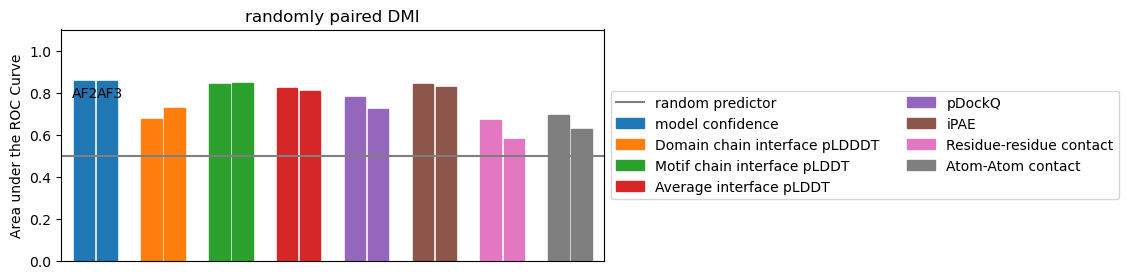

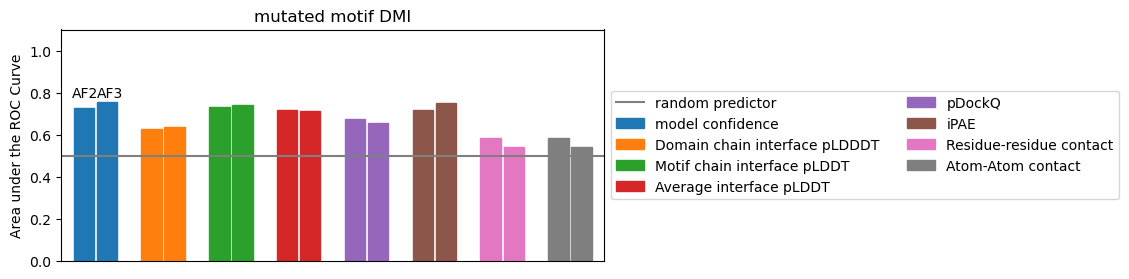

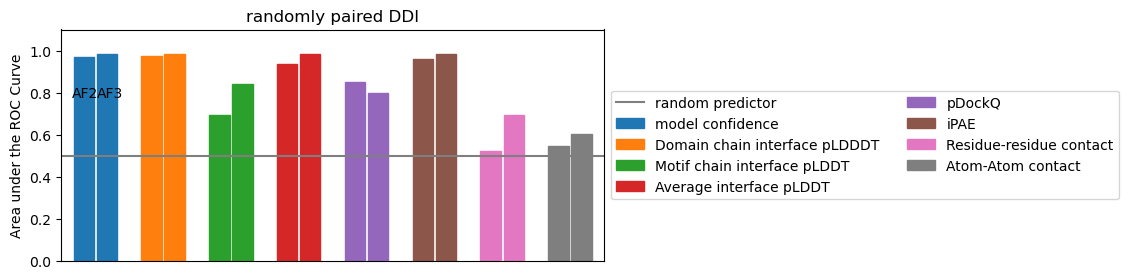

In [51]:
benchmark_sets = {
    "random_DMI" : "randomly paired DMI", 
    "mutations_DMI": "mutated motif DMI", 
    "random_DDI": "randomly paired DDI"
    }

categories = [
    ("model confidence", "model_confidence", "tab:blue"),
    ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt", "tab:orange"),
    ("Motif chain interface pLDDT", "chainB_intf_avg_plddt", "tab:green"),
    ("Average interface pLDDT", "intf_avg_plddt", "tab:red"),
    ("pDockQ", "pDockQ", "tab:purple"),
    ("iPAE", "iPAE", "tab:brown"),
    ("Residue-residue contact", "num_res_res_contact", "tab:pink"),
    ("Atom-Atom contact", "num_atom_atom_contact", "tab:gray"),
    #("ipSAE", "ipSAE", False, True)
]

data_ref = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]
data_ref_DDI = dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")]

for benchmark_set, bs_label in benchmark_sets.items():
    data = dataAF[(dataAF["benchmark_set"] == benchmark_set) & (dataAF["model_id"] == "ranked_0")]

    plt.figure(figsize=(7,3))
    roc_scores = {}

    for i, (label, c, color) in enumerate(categories):
        y_true, y_score = data_ref[c+"_AF2"].dropna(), data[c+"_AF2"].dropna()
        roc_score = roc_auc_score(list(np.full(len(y_true), 1)) + list(np.full(len(y_score), 0)), list(y_true)+list(y_score))
        if roc_score < 0.5:
            roc_score = 1 - roc_score
        roc_scores[label] = roc_score
        br = plt.bar([1+i-0.17], [roc_score], width=0.3, label=label)
        br[0].set_color(color)

        y_true, y_score = data_ref[c+"_AF3"].dropna(), data[c+"_AF3"].dropna()
        roc_score = roc_auc_score(list(np.full(len(y_true), 1)) + list(np.full(len(y_score), 0)), list(y_true)+list(y_score))
        if roc_score < 0.5:
            roc_score = 1 - roc_score
        roc_scores[label] = roc_score

        br = plt.bar([1+i+0.17], [roc_score], width=0.3)
        br[0].set_color(color)
    
    #plt.xticks(np.array(range(1,1+len(roc_scores)))-0.5, roc_scores.keys(), rotation=20)
    plt.title(bs_label)
    plt.ylim([0,1.1])
    plt.plot([0, len(roc_scores)+1], [0.5, 0.5], c="tab:gray", label="random predictor")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    plt.ylabel("Area under the ROC Curve")
    plt.gca().get_xaxis().set_visible(False)
    plt.xlim([0.5,len(roc_scores)+0.5])
    plt.text(0.65, 0.78, "AF2")
    plt.text(1.02, 0.78, "AF3")
    plt.show()

## ROC Curve

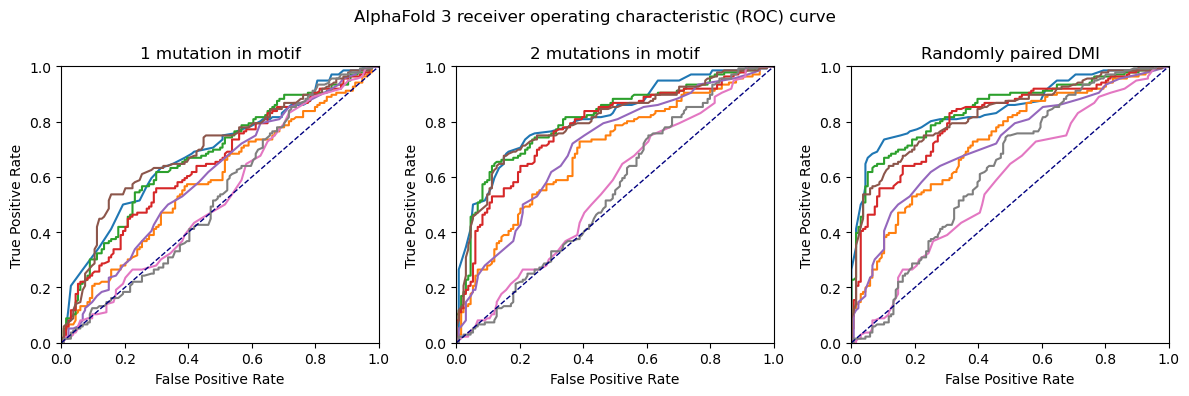

In [60]:
#plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
#plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig: Figure
axes: list[Axes] = list(axes)


    
axes[0].set_title("1 mutation in motif")
axes[1].set_title("2 mutations in motif")
axes[2].set_title("Randomly paired DMI")

# (display name, column name, reverse, highlight)
metric_columns = [("ranking score", "ranking_score"), 
                  #("model confidence", "model_confidence"),
                  ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                  ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                  ("Average interface pLDDT", "intf_avg_plddt"),
                  ("pDockQ", "pDockQ"),
                  ("iPAE", "iPAE", True),
                  ("Residue-residue contact", "num_res_res_contact"),
                  ("Atom-Atom contact", "num_atom_atom_contact"),
                  #("ipSAE", "ipSAE", False, True)
                ]

metric_columns = [[x[0], x[1] +"_AF3", x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
#rows_true = dataAF[dataAF["benchmark_set"] == "known_minimal"]
rows_true = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DMI", dataAF["model_id"] == "ranked_0")]



for ax, rows_false in zip(axes, rows_sets):
    y_true = [1]*len(rows_true) + [0]*len(rows_false)

    for metric_label, metric_column, reverse, highlight in metric_columns:
        y_score = rows_true[metric_column].to_list() + rows_false[metric_column].to_list()
        if reverse:
            y_score = [-y for y in y_score]
        ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label, alpha=1) #alpha=0.2+0.8*highlight)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.suptitle("AlphaFold 3 receiver operating characteristic (ROC) curve")

fig.tight_layout()
#axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#          fancybox=True, shadow=True, ncol=5)
plt.show()


In [25]:
rows_true

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom_AF2,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
5,alphafold3,known_DMI,DEG_COP1_1_5IGO,ranked_0,0.97,324,8,A,B,352,...,2.842609,0.203083,3.647857,11.785731,0.818182,580.310,6.083,0,9,0
10,alphafold3,known_DMI,DEG_Kelch_Keap1_1_2FLU,ranked_0,0.96,285,6,A,B,325,...,0.925743,0.956840,0.406243,0.409987,0.135135,980.534,5.189,0,6,55
15,alphafold3,known_DMI,DEG_Kelch_Keap1_2_3WN7,ranked_0,0.92,286,7,A,B,324,...,1.173802,0.627900,1.098010,3.811533,0.357143,969.729,4.725,0,2,104
20,alphafold3,known_DMI,DEG_MDM2_SWIB_1_1YCR,ranked_0,0.89,80,8,A,B,30,...,1.288624,0.927639,0.491499,0.974915,0.038462,981.580,5.315,0,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,alphafold3,known_DMI,TRG_ER_FFAT_1_2RR3,ranked_0,0.94,125,9,A,B,4,...,1.815889,0.832137,1.023273,1.642793,0.128205,815.717,4.674,0,4,18
660,alphafold3,known_DMI,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_0,0.98,147,7,A,B,1,...,1.292265,0.949574,0.470555,1.451951,0.093750,810.788,4.691,0,5,19
665,alphafold3,known_DMI,TRG_NES_CRM1_1_3GB8,ranked_0,0.91,179,16,A,B,447,...,2.015826,0.683162,1.423170,2.824227,0.153846,1389.344,4.832,5,5,104
670,alphafold3,known_DMI,TRG_NLS_Bipartite_1_1PJM,ranked_0,0.67,460,17,A,B,70,...,0.996400,0.838144,0.780334,2.332849,0.160000,883.012,4.542,3,12,29


#### ROC Curve für new metrics

In [31]:
rows_true

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom_AF2,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
5,alphafold3,known_DMI,DEG_COP1_1_5IGO,ranked_0,0.97,324,8,A,B,352,...,2.842609,0.203083,3.647857,11.785731,0.818182,580.310,6.083,0,9,0
10,alphafold3,known_DMI,DEG_Kelch_Keap1_1_2FLU,ranked_0,0.96,285,6,A,B,325,...,0.925743,0.956840,0.406243,0.409987,0.135135,980.534,5.189,0,6,55
15,alphafold3,known_DMI,DEG_Kelch_Keap1_2_3WN7,ranked_0,0.92,286,7,A,B,324,...,1.173802,0.627900,1.098010,3.811533,0.357143,969.729,4.725,0,2,104
20,alphafold3,known_DMI,DEG_MDM2_SWIB_1_1YCR,ranked_0,0.89,80,8,A,B,30,...,1.288624,0.927639,0.491499,0.974915,0.038462,981.580,5.315,0,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,alphafold3,known_DMI,TRG_ER_FFAT_1_2RR3,ranked_0,0.94,125,9,A,B,4,...,1.815889,0.832137,1.023273,1.642793,0.128205,815.717,4.674,0,4,18
660,alphafold3,known_DMI,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_0,0.98,147,7,A,B,1,...,1.292265,0.949574,0.470555,1.451951,0.093750,810.788,4.691,0,5,19
665,alphafold3,known_DMI,TRG_NES_CRM1_1_3GB8,ranked_0,0.91,179,16,A,B,447,...,2.015826,0.683162,1.423170,2.824227,0.153846,1389.344,4.832,5,5,104
670,alphafold3,known_DMI,TRG_NLS_Bipartite_1_1PJM,ranked_0,0.67,460,17,A,B,70,...,0.996400,0.838144,0.780334,2.332849,0.160000,883.012,4.542,3,12,29


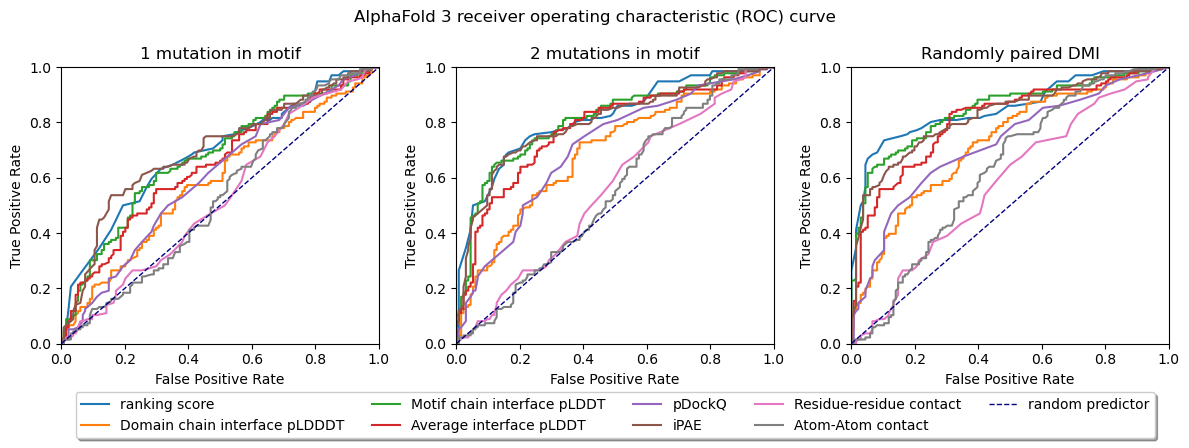

In [35]:
#plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
#plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig: Figure
axes: list[Axes] = list(axes)


    
axes[0].set_title("1 mutation in motif")
axes[1].set_title("2 mutations in motif")
axes[2].set_title("Randomly paired DMI")

# (display name, column name, reverse, highlight)
metric_columns = [("ranking score", "ranking_score"), 
                  #("model confidence", "model_confidence"),
                  ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                  ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                  ("Average interface pLDDT", "intf_avg_plddt"),
                  ("pDockQ", "pDockQ"),
                  ("iPAE", "iPAE", True),
                  ("Residue-residue contact", "num_res_res_contact"),
                  ("Atom-Atom contact", "num_atom_atom_contact"),
                  #("ipSAE", "ipSAE", False, True)
                ]

metric_columns = [[x[0], x[1] +"_AF3", x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
#rows_true = dataAF[dataAF["benchmark_set"] == "known_minimal"]
rows_true = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DMI", dataAF["model_id"] == "ranked_0")]



for ax, rows_false in zip(axes, rows_sets):
    y_true = [1]*len(rows_true) + [0]*len(rows_false)

    for metric_label, metric_column, reverse, highlight in metric_columns:
        y_score = rows_true[metric_column].to_list() + rows_false[metric_column].to_list()
        if reverse:
            y_score = [-y for y in y_score]
        ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label, alpha=1) #alpha=0.2+0.8*highlight)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.suptitle("AlphaFold 3 receiver operating characteristic (ROC) curve")

fig.tight_layout()
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()


##### 2b ipSAE

In [44]:
dataAF["hbonds_AF2"]

0         10
1          9
2          2
3         12
4         13
        ... 
3165    <NA>
3166    <NA>
3167    <NA>
3168    <NA>
3169    <NA>
Name: hbonds_AF2, Length: 3170, dtype: Int64

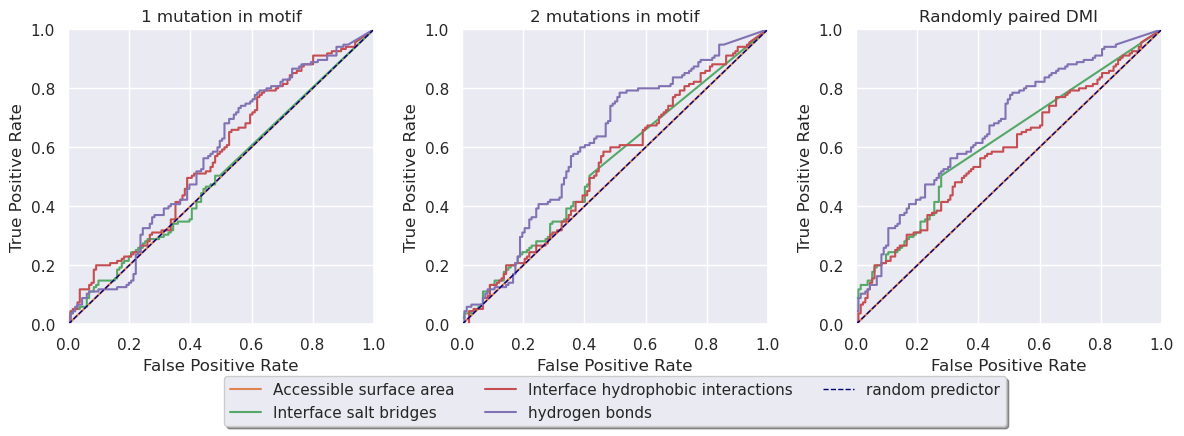

In [70]:
#plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
#plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig: Figure
axes: list[Axes] = list(axes)


    
axes[0].set_title("1 mutation in motif")
axes[1].set_title("2 mutations in motif")
axes[2].set_title("Randomly paired DMI")

# (display name, column name, reverse, highlight)
metric_columns = [#("ranking score", "ranking_score"), 
                  #("model confidence", "model_confidence"),         
                  #("Interface distance", "min_distance", True),
                  ("Accessible surface area", "buried_area"),
                  ("Interface salt bridges", "salt_bridges"),
                  ("Interface hydrophobic interactions", "hydrophobic_interactions"),
                  ("hydrogen bonds", "hbonds"),
                  
                ]

metric_columns = [[x[0], x[1] +"_AF2_normed", x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
#rows_true = dataAF[dataAF["benchmark_set"] == "known_minimal"]
rows_true = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DMI", dataAF["model_id"] == "ranked_0")]



for ax, rows_false in zip(axes, rows_sets):
    
    ax.plot([],[])
    for metric_label, metric_column, reverse, highlight in metric_columns:
        tr,fa = rows_true[metric_column].dropna(), rows_false[metric_column].dropna()
        y_true = [1]*len(tr) + [0]*len(fa)
        y_score = tr.to_list() + fa.to_list()
        if reverse:
            y_score = [-y for y in y_score]
        ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label)#, alpha=0.2+0.8*highlight)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')


fig.tight_layout()
#axes[2].legend(loc="lower right")
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.show()


## 3 Classification

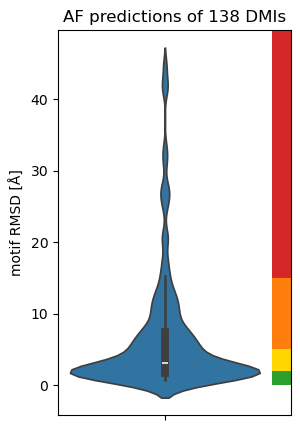

In [63]:
plt.figure(figsize=(3,5))
p = sns.violinplot(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]["RMSD_all_atom_peptide_AF2"], bw_adjust=0.4)
p.set_title("AF predictions of 138 DMIs")
p.set_ylabel("motif RMSD [Å]")
plt.ylim(p.get_ylim())
plt.bar([0.5], [2], bottom=0, width=0.1, label="Correct sidechain", color="tab:green")
plt.bar([0.5], [5], bottom=2, width=0.1, label="Correct backbone", color="gold")
plt.bar([0.5], [15], bottom=5, width=0.1, label="Correct backbone", color="tab:orange")
plt.bar([0.5], [60], bottom=15, width=0.1, label="Correct backbone", color="tab:red")
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.xlim([-0.45,0.53])
plt.show()

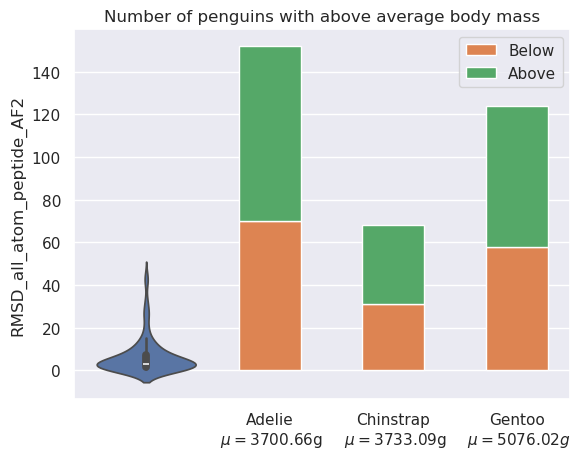

In [72]:
species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

p = sns.violinplot(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]["RMSD_all_atom_peptide_AF2"])

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

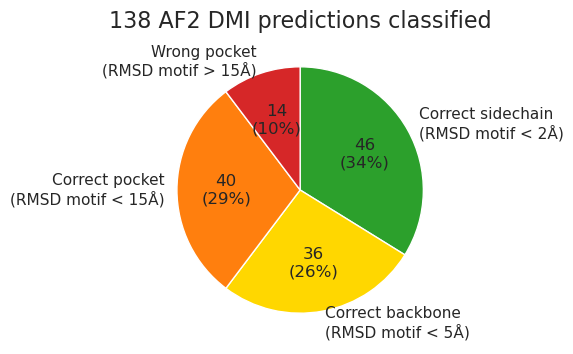

In [29]:
d = {}
af_v = "AF2"
for label, ra in {
    "Correct sidechain\n(RMSD motif < 2Å)": (-np.inf, 2), 
    "Correct backbone\n(RMSD motif < 5Å)": (2, 5), 
    "Correct pocket\n(RMSD motif < 15Å)": (5, 15), 
    "Wrong pocket\n(RMSD motif > 15Å)": (15, np.inf)
    }.items():
    d[label] = len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] > ra[0]) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= ra[1])])
plt.figure(figsize=(6,4))
plt.pie(list(d.values()), labels=list(d.keys()), autopct=lambda v: f"{v/100*sum(d.values()):.0f}\n({v:1.0f}%)", startangle=90, counterclock=False, colors=["tab:green", "gold", "tab:orange", "tab:red"])
plt.title("138 AF2 DMI predictions classified", fontdict={"size": 16})
#plt.savefig("export.svg")

plt.show()

## 4 Comparing AF with solved

In [29]:
dataAF_Solved[dataAF_Solved["PDB_id"] == "4GGD"]

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,set,DDI_pfam_id_solved,path,chainA_id_solved,chainB_id_solved,min_distance,buried_area,salt_bridges,hbonds,hydrophobic_interactions
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1355,alphafold3,mutations_DMI,DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,ranked_0,0.92,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1356,alphafold3,mutations_DMI,DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,ranked_1,0.91,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1357,alphafold3,mutations_DMI,DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,ranked_2,0.91,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1358,alphafold3,mutations_DMI,DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,ranked_3,0.91,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0
1359,alphafold3,mutations_DMI,DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,ranked_4,0.90,312,5,A,B,165,...,DMI,NaN,DMI\4GGD_min_DMI.pdb,A,B,6.21,579.778,0,0,0


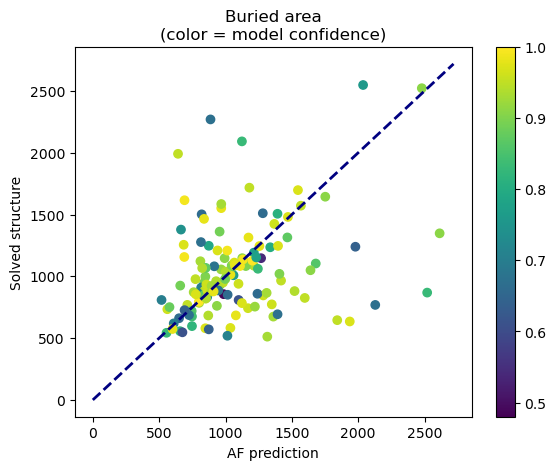

In [32]:
from matplotlib import cm

dataAF_Solved = pd.merge(
    left=dataAF,
    right=dataSolved,
    left_on=["PDB_id"],
    right_on=["PDB_id"],
    suffixes=["","_solved"]
)

plt.title("Buried area\n(color = model confidence)")
data = dataAF_Solved[(dataAF_Solved["benchmark_set"] == "known_DMI") & (dataAF_Solved["model_id"] == "ranked_0")]
_scatter = plt.scatter(data["buried_area"+"_AF3"], data["buried_area"], c=data["ranking_score_AF3"])#, vmax=15, cmap="RdYlGn_r")
plt.colorbar(_scatter)
plt.xlabel("AF prediction")
plt.ylabel("Solved structure")
plt.plot([0, plt.xlim()[1]], [0, plt.xlim()[1]], color='navy', lw=2, linestyle='--')
plt.show()